# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot as plt
from scipy import stats



# A. Solve using Analytical Calculus - Random data points

## Create random X and y samples

In [2]:
# Generate 'random' data
#np.random.seed(1)

# Number of Samples
n = 100

# Create r and r1, random vectors of 100 numbers each with mean = 0 and standard deviation = 1
r = np.random.randn(n)
r1 = np.random.randn(n)

# Create random Input vector X using r
# mean = 3
# stddev = 2
X = 3 * r + 2

# Create random Residual term Res using r
# mean = 0.8
# stddev = 0
res = 0.8 * r1 

# Generate Y values based on the simulated regression line and error/noise
# Population Regression Line
yreg = 2.5 + 0.35 * X 
# Adding noise/error
y = yreg + res                  

# Storing Population Regression Line "RegL", data points X and y in a data frame
rl = pd.DataFrame(
    {'X': X,
     'y': y,
     'RegL':yreg}
)

# Show the first five rows of our dataframe
rl.head()

,X,y,RegL
0,4.564455,3.614327,4.097559
1,5.448886,4.051832,4.407110
2,0.775571,2.172854,2.771450
3,5.068190,4.409517,4.273866
4,0.553202,2.766314,2.693621


In [48]:
temp = [rl['X'], rl['y']]
headers = ["X", "y"]
data = pd. concat(temp, axis=1, keys=headers)

#data = pd.concat(rl['X'], rl['y'],axis=1 , keys=['X', 'y'])
data.head()

,X,y
0,4.564455,3.614327
1,5.448886,4.051832
2,0.775571,2.172854
3,5.068190,4.409517
4,0.553202,2.766314


In [49]:
X=rl['X'] 
y=rl['y']
#temp = [rl['X'], rl['y']]
headers = ["X", "y"]
data = pd.concat([X, y], axis=1, keys=headers)
data.head()

,X,y
0,4.564455,3.614327
1,5.448886,4.051832
2,0.775571,2.172854
3,5.068190,4.409517
4,0.553202,2.766314


In [53]:
y_pred = [0]*len(X)
data['y_pred']= [0]*len(X)
data.head()

,X,y,y_pred
0,4.564455,3.614327,0
1,5.448886,4.051832,0
2,0.775571,2.172854,0
3,5.068190,4.409517,0
4,0.553202,2.766314,0


In [3]:
x_test = rl['X'].values
x_test

array([ 4.56445455e+00,  5.44888586e+00,  7.75571009e-01,  5.06818994e+00,
        5.53202069e-01,  3.52020350e+00, -2.52200274e-02,  6.09395700e+00,
        5.10812347e+00,  5.14014849e+00, -2.58959429e+00, -1.52884089e+00,
        3.00969405e+00,  1.52904011e+00,  2.26818430e+00,  3.86217909e+00,
       -1.02566390e-01,  5.10397436e+00, -1.01470402e+00,  5.25495836e+00,
        6.50116119e-01,  4.25016234e+00,  3.31015757e+00,  3.70101534e+00,
       -1.44974720e-01,  1.70254928e+00, -2.39441559e+00,  1.14978176e+00,
        1.31642434e+00, -2.30002787e-01,  3.54672689e+00,  5.75491069e-01,
       -5.67341789e-01,  6.05447272e+00,  6.91281295e+00, -2.70889173e+00,
        2.72488898e+00,  7.31828826e-01,  2.50942420e+00, -2.62670184e+00,
        1.65416747e+00, -1.39219176e+00, -2.33619536e-03,  6.93415492e+00,
        2.42028986e+00,  4.60251846e+00, -2.16778817e+00,  6.14323462e+00,
        3.64660045e+00,  6.59314614e+00, -9.28652595e-01,  2.24709792e+00,
       -1.37625657e+00,  

## Calculate coefficients alpha and beta

In [4]:
# Assuming y = aX + b
# a ~ alpha
# b ~ beta

# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of alpha
rl['CovXY'] = (rl['X'] - xmean) * (rl['y'] - ymean)
rl['VarX'] = (rl['X'] - xmean)**2

# Calculate alpha
# Numerator: Covariance between X and y
# Denominator: Variance of X
alpha = rl['CovXY'].sum() / rl['VarX'].sum()

# Calculate beta
beta = ymean - (alpha * xmean)
print('alpha =', alpha)
print('beta =',beta)

alpha = 0.3243532182183525
beta = 2.4969622940605984


In [5]:
X

array([ 4.56445455e+00,  5.44888586e+00,  7.75571009e-01,  5.06818994e+00,
        5.53202069e-01,  3.52020350e+00, -2.52200274e-02,  6.09395700e+00,
        5.10812347e+00,  5.14014849e+00, -2.58959429e+00, -1.52884089e+00,
        3.00969405e+00,  1.52904011e+00,  2.26818430e+00,  3.86217909e+00,
       -1.02566390e-01,  5.10397436e+00, -1.01470402e+00,  5.25495836e+00,
        6.50116119e-01,  4.25016234e+00,  3.31015757e+00,  3.70101534e+00,
       -1.44974720e-01,  1.70254928e+00, -2.39441559e+00,  1.14978176e+00,
        1.31642434e+00, -2.30002787e-01,  3.54672689e+00,  5.75491069e-01,
       -5.67341789e-01,  6.05447272e+00,  6.91281295e+00, -2.70889173e+00,
        2.72488898e+00,  7.31828826e-01,  2.50942420e+00, -2.62670184e+00,
        1.65416747e+00, -1.39219176e+00, -2.33619536e-03,  6.93415492e+00,
        2.42028986e+00,  4.60251846e+00, -2.16778817e+00,  6.14323462e+00,
        3.64660045e+00,  6.59314614e+00, -9.28652595e-01,  2.24709792e+00,
       -1.37625657e+00,  

## Prediction - Least Squares Line

In [6]:
ypred = alpha * X + beta

## Calculate Model Metrics - RSS, RSE(σ), TSS and R^2 Statistic

In [7]:
# Residual Errors
RE = (rl['y'] - ypred)**2
#Residual Sum Squares
RSS = RE.sum()
print("Residual Sum of Squares (RSS) is:",RSS)

# Estimated Standard Variation (sigma) or RSE
RSE = np.sqrt(RSS/(n-2))
print("\nResidual Standar Error (Standard Deviation σ) is:",RSE)

# Total Sum of squares (TSS)
TE = (rl['y'] - ymean)**2
# Total Sum Squares
TSS = TE.sum()
print("\nTotal Sum of Squares (TSS) is:",TSS)

# R^2 Statistic
R2 = 1 - RSS/TSS
print("\n R2 Statistic is:",R2)

Residual Sum of Squares (RSS) is: 61.714786856657994

Residual Standar Error (Standard Deviation σ) is: 0.7935633075105744

Total Sum of Squares (TSS) is: 139.24516725792157

 R2 Statistic is: 0.556790457636891


## Assessing Coefficients accuracy

In [8]:
# Degrees of freedom
df = 2*n - 2

# Standard error, t-Statistic and  p-value for Slope "alpha" coefficient
SE_alpha = np.sqrt(RSE**2/rl['VarX'].sum())
t_alpha = alpha/SE_alpha
p_alpha = 1 - stats.t.cdf(t_alpha,df=df)

# Standard error, t-Statistic and  p-value for Intercept "beta" coefficient
SE_beta = np.sqrt(RSE*(1/n + xmean**2/(rl['VarX'].sum())))
t_beta = beta/SE_beta 
p_beta = 1 - stats.t.cdf(t_beta,df=df)

## Coefficients Assessment Summary

In [9]:
# Assessment of Coefficients
mds = pd.DataFrame(
    {'Name':['Slope (alpha)', 'Intercept (beta)'],
     'Coefficient': [alpha, beta],
     'RSE':[SE_alpha, SE_beta],
     't-Statistic':[t_alpha, t_beta],
     'p-Value':[p_alpha, p_beta]
    }
)
mds

,Name,Coefficient,RSE,t-Statistic,p-Value
0,Slope (alpha),0.324353,0.029232,11.095692,0.0
1,Intercept (beta),2.496962,0.111056,22.483774,0.0


## Model Assessment Summary

In [10]:
# Model Assessment - Storing all key indicators in dummy data frame with range 1
ms = pd.DataFrame(
    {'Ref': range(0,1),
     'Residual Sum of Squares (RSS)': RSS,
     'RSE (Standard Deviation σ)': RSE,
     'Total Sum of Squares (TSS)': TSS,
     'R2 Statistic': R2
     }
)

# Cut out the dummy index column to see the Results
ms.iloc[:,1:9]    

,Residual Sum of Squares (RSS),RSE (Standard Deviation σ),Total Sum of Squares (TSS),R2 Statistic
0,61.714787,0.793563,139.245167,0.55679


## Plot Predicted vs Actual vs Sampled Data

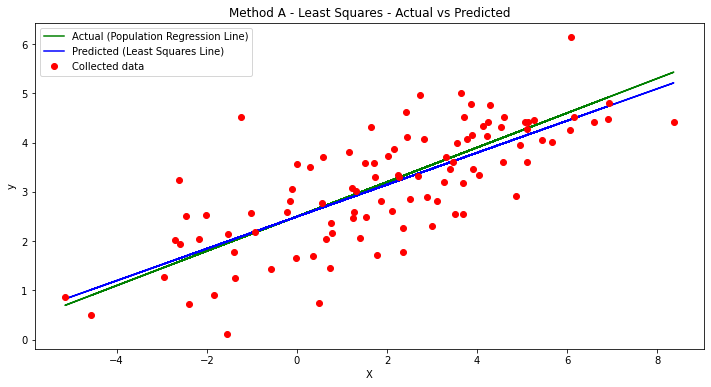

In [11]:

# Plot regression against actual data
plt.figure(figsize=(12, 6))
# Population Regression Line
plt.plot(X,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
plt.plot(X, ypred, label = 'Predicted (Least Squares Line)', color='blue')     
# scatter plot showing actual data
plt.plot(X, y, 'ro', label ='Collected data')   
plt.title('Method A - Least Squares - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
#plt.show()

# B. Solve using Matrix Algebra - Fixed data points

## Create and Format Data

In [12]:
# Reuse the same random inputs created above but reformated to Matrices
X1 = np.matrix([np.ones(n), rl['X']]).T
y1 = np.matrix(rl['y']).T

## Solve for projection matrix

In [13]:
A = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(y1)

m = A[1].item()
b = A[0].item()

print("b (bias/Y intercept) =",b,", and m (slope) =",m)

b (bias/Y intercept) = 2.4969622940605998 , and m (slope) = 0.32435321821835233


In [14]:
A[1]

matrix([[0.32435322]])

In [15]:
m

0.32435321821835233

In [16]:
b

2.4969622940605998

In [17]:
X1[1].T[1]

matrix([[5.44888586]])

In [18]:
X1_array = np.squeeze(np.asarray(X1[:].T[1]))

In [19]:
X1_array[1]

5.448885855015297

In [20]:
X[1]

5.448885855015297

In [21]:
ypred[0]

3.977457817270142

## Plot data and predictions

In [22]:
#xx = np.linspace(0, .5, 2)
y1pred = b + m * X1

In [23]:
y1pred[1].T[1]
y1pred_array = np.squeeze(np.asarray(y1pred[:].T[1]))

In [24]:
y1[0]

matrix([[3.61432744]])

In [25]:
y1_array = np.squeeze(np.asarray(y1[:]))
y1_array[1]

4.051831617264854

<Figure size 432x288 with 0 Axes>

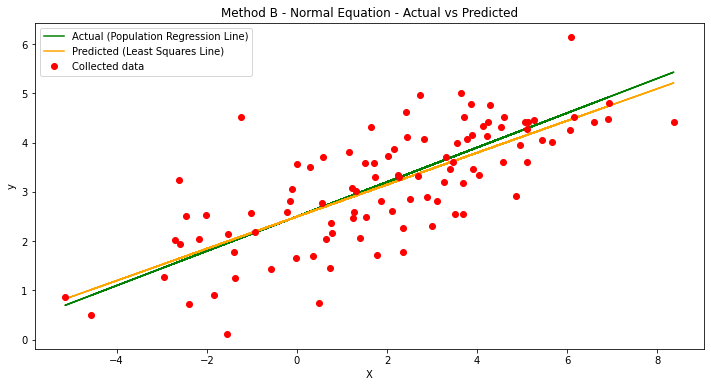

In [26]:
plt.figure(1)
# Plot regression against actual data
plt.figure(figsize=(12, 6));
# Population Regression Line
plt.plot(X1_array,rl['RegL'], label = 'Actual (Population Regression Line)',color='green')
# Least squares line
plt.plot(X1_array, y1pred_array, label = 'Predicted (Least Squares Line)', color='orange')     
# scatter plot showing actual data
plt.plot(X1_array, y1_array, 'ro', label ='Collected data')   
plt.title('Method B - Normal Equation - Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
#plt.show()


#plt.figure(1)
#plt.scatter(input[:,0], input[:,1], color='r')
#plt.plot(xx, yy.T, color='b')
#plt.show()

In [27]:
X.shape

(100,)

In [28]:
x1=rl['X'].values.reshape(-1, 1)
x1.shape

(100, 1)

In [29]:
y1=rl['y'].values.reshape(-1, 1)
y1.shape

(100, 1)

In [30]:
rl['X'].values.reshape(-1,1)


array([[ 4.56445455e+00],
       [ 5.44888586e+00],
       [ 7.75571009e-01],
       [ 5.06818994e+00],
       [ 5.53202069e-01],
       [ 3.52020350e+00],
       [-2.52200274e-02],
       [ 6.09395700e+00],
       [ 5.10812347e+00],
       [ 5.14014849e+00],
       [-2.58959429e+00],
       [-1.52884089e+00],
       [ 3.00969405e+00],
       [ 1.52904011e+00],
       [ 2.26818430e+00],
       [ 3.86217909e+00],
       [-1.02566390e-01],
       [ 5.10397436e+00],
       [-1.01470402e+00],
       [ 5.25495836e+00],
       [ 6.50116119e-01],
       [ 4.25016234e+00],
       [ 3.31015757e+00],
       [ 3.70101534e+00],
       [-1.44974720e-01],
       [ 1.70254928e+00],
       [-2.39441559e+00],
       [ 1.14978176e+00],
       [ 1.31642434e+00],
       [-2.30002787e-01],
       [ 3.54672689e+00],
       [ 5.75491069e-01],
       [-5.67341789e-01],
       [ 6.05447272e+00],
       [ 6.91281295e+00],
       [-2.70889173e+00],
       [ 2.72488898e+00],
       [ 7.31828826e-01],
       [ 2.5

## C. Using SKlearn library

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [32]:
lr

LinearRegression()

In [33]:
lr.coef_[0][0]

0.3243532182183525

In [34]:
lr.intercept_[0]

2.4969622940605984